###### Import here

In [320]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from numpy import asarray
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import math


# Step 2: Prepare the Data for testing

In [311]:
df = pd.read_pickle("cleaned.pkl")
df

,id,carat,depth,table,x,y,z,price,cut_scale,color_scale,clarity_scale
0,0,0.50,62.3,55.0,5.11,5.07,3.17,1845,1.0,1.00,0.500
1,1,1.54,63.6,60.0,7.30,7.33,4.65,10164,0.4,0.28,0.625
2,2,1.32,61.7,60.0,6.95,7.01,4.31,5513,0.6,0.14,0.250
3,3,1.20,62.1,55.0,6.83,6.79,4.23,5174,1.0,0.28,0.375
4,4,1.73,61.2,60.0,7.67,7.65,4.69,10957,0.8,0.28,0.375
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.40,62.9,58.0,4.69,4.72,2.96,687,0.6,0.71,0.375
40451,40451,0.95,62.9,58.0,6.26,6.21,3.92,3984,0.8,0.43,0.375
40452,40452,0.63,61.2,56.0,5.56,5.51,3.39,2182,1.0,0.71,0.500
40453,40453,1.22,63.8,55.0,6.77,6.71,4.30,7201,0.4,0.43,0.500



We want to check a simple heatmap to see if there are any strongly correlated categories.
<br>We don't expect to find many because this is a well established field of evaluation. 
<br>But maybe measurements are similar carats.


In [259]:
# We will look are correlation of absolute values
corr_matrix = df.corr().abs()

<AxesSubplot:>

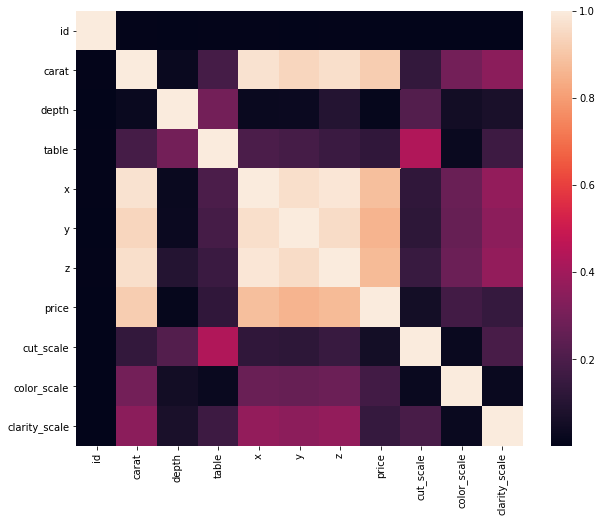

In [260]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)

In [312]:
# Exactly what we expected. It seems like if we are going to use carats 
# and table and depth we might have enough dimensions and we could drop the x,y,z.
df = df.drop(["x","y","z"], axis=1)

In [262]:
corr_matrix = df.corr().abs()

<AxesSubplot:>

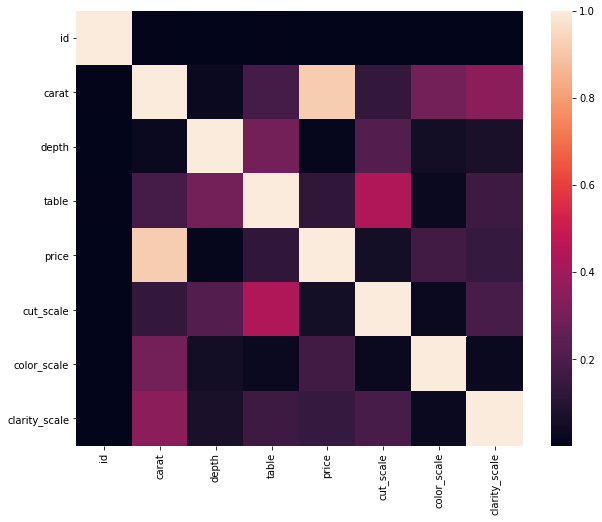

In [263]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)

**Lookin' smart! There aren't any strong positive correlations except for the expected price and carats.**

Just browsing for any outliers.
<br>We could think about coming back and to clean up some of the outliers, especially if we are going to do polynomials


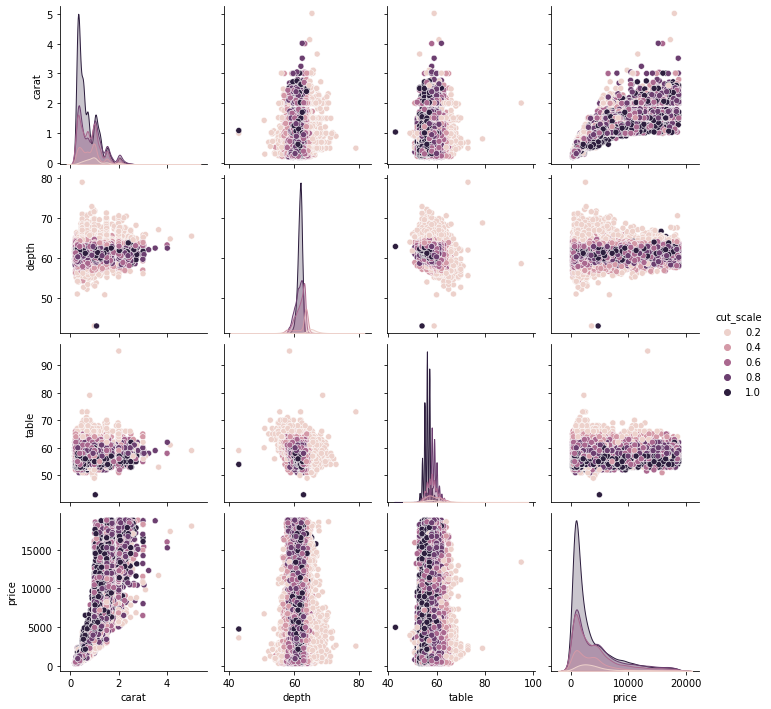

In [325]:
# The darker the tone of the point the higher on the quality of cut scale
sns.pairplot(df.drop(["clarity_scale","color_scale","id"], axis=1), hue="cut_scale")

**Observations on Cut**
<br> If you look at the price to carat relationship, there is a tendency that the more expensive smaller diamonds have higher quality cuts and it seems that might affect the price scale by lowering the quantity or size of the diamond and raising the price of the diamond. There could be a large number of small diamonds that might be less expensive because of their size(maybe very small), but the relatively expensive because of other factors such as cut. They, however, are not the most expesive due to their small size.

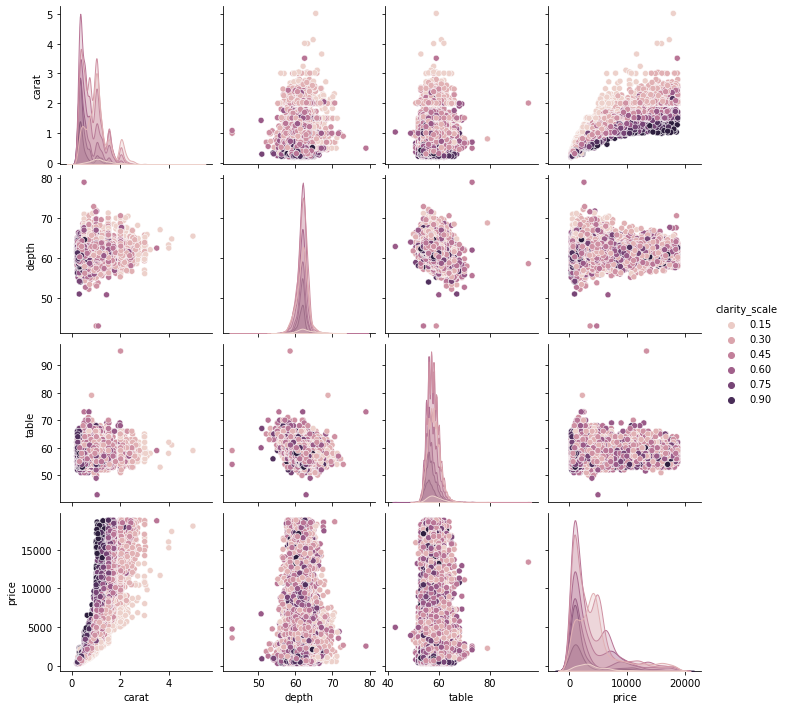

In [257]:
# The darker the tone of the point the higher on the calrity scale
sns.pairplot(df.drop(["cut_scale","color_scale","id"], axis=1), hue="clarity_scale")

**Observations on Clarity:**
<br> We can see the higher clarity diamonds are very concentrated at smaller sizes and higher prices. There is an inverser relationship with carat size and clarity. There are also a much lower number of diamonds with a high clarity rating. It could be that larger diamonds are more likely to contain inclusions, which is what clarity is evaluating. But there are a very large number diamonds with low clarity. 

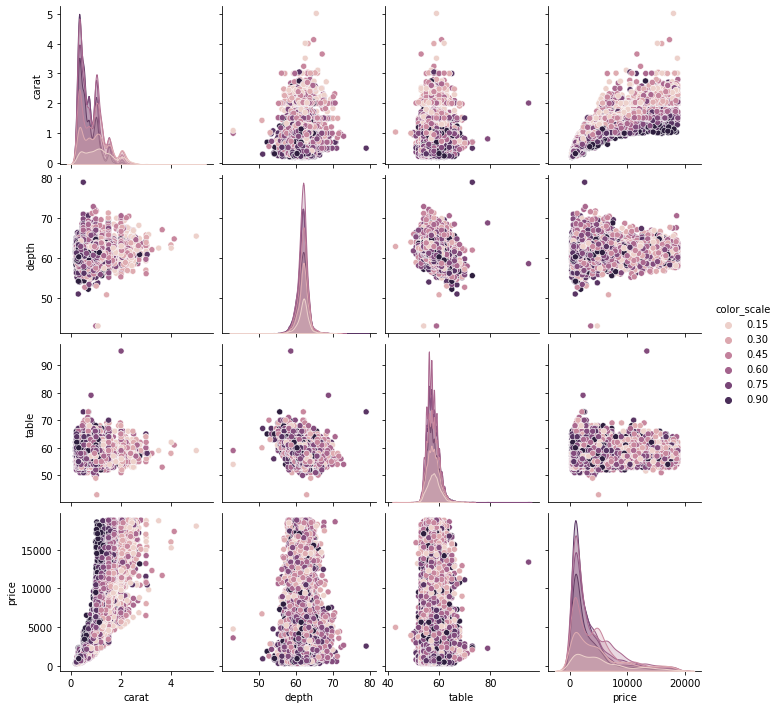

In [258]:
# The darker the tone of the point the higher on color scale
sns.pairplot(df.drop(["cut_scale","clarity_scale","id"], axis=1), hue="color_scale")

**Observation on Color:**
<br>Again, we are seeing a relationship between high color rating and size. For the same price as a 1-carat diamond with D color class you could get a 2-carat diamond with I or J color class. Remember, we have change those values to percentiles to process them easier.

<AxesSubplot:xlabel='carat', ylabel='price'>

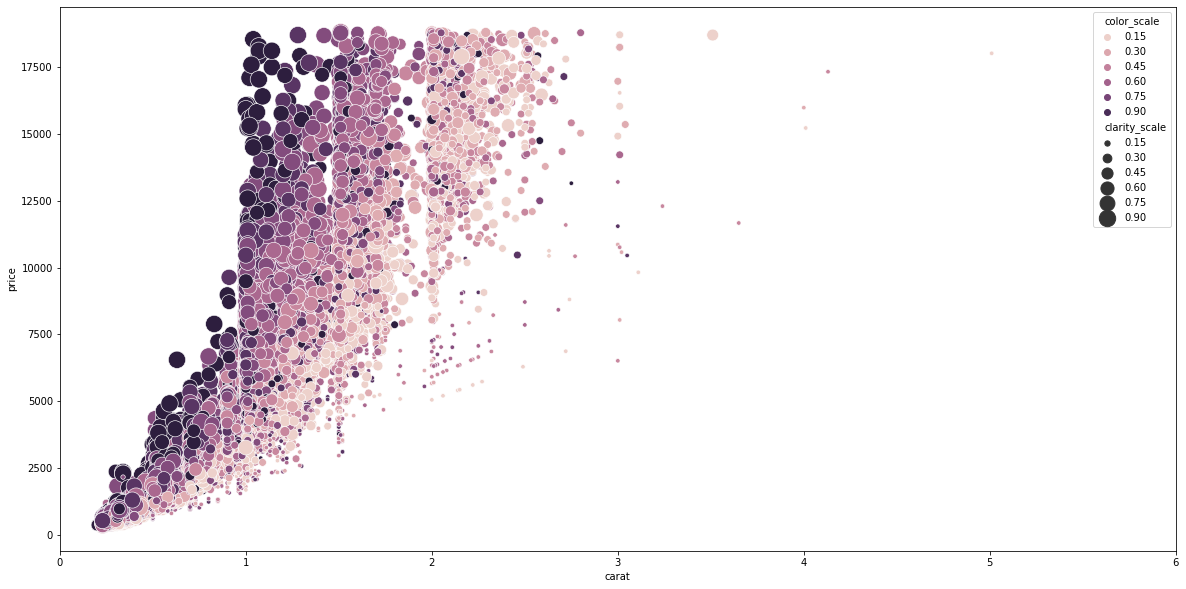

In [323]:
# We want to see the price in relation to carats and indicate both the color rating and the clarity rating
plt.figure(figsize=(20,10))
plt.xlim(right=6)
sns.scatterplot(data = df, x = "carat", y ="price", hue = "color_scale", size = "clarity_scale", sizes=(20, 300))

**Observations on Price/Carat and Color/Clarity relationship:**
<br>There are very few 3 carat diamonds with high clarity or color quality, while the diamonds high in these aspects are concentrated around the 1 carat measure or lower.

In [313]:
# Let's look at correlations in a numeric form
corr = df.corr()

In [314]:
corr["price"].sort_values()

color_scale     -0.174354
clarity_scale   -0.144279
cut_scale       -0.052246
depth           -0.013715
id              -0.004630
table            0.127199
carat            0.921776
price            1.000000
Name: price, dtype: float64

# 2.1: Train-Test-Split 

In [156]:
# We are separating out the "data" from the "target"
X = pd.DataFrame(df.drop(['price'], axis=1))
y = pd.DataFrame(df["price"])

In [157]:
# We will separate our "train" and "test" groups
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

### Method 1: Linear Regression

#### This was an experiment that did not work out too well. I abandonded it. Might come back to figure it out later.
------------

In [326]:
lr = LinearRegression()

In [9]:
error = pd.DataFrame(columns=["train_mse", "test_mse"])

In [10]:
lr1 = LinearRegression()

In [11]:
# Fit the Linear Regression model to the data minimizes the residual sum of squares
lr1.fit(X_train["carat"].to_frame(), y_train)
mse_train = mean_squared_error(y_train, lr1.predict(X_train["carat"].to_frame()))
mse_test = mean_squared_error(y_test, lr1.predict(X_test["carat"].to_frame()))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="carat"))

In [12]:
lr2 = LinearRegression()

In [13]:
lr2.fit(X_train["color_scale"].to_frame(), y_train)
mse_train = mean_squared_error(y_train, lr2.predict(X_train["color_scale"].to_frame()))
mse_test = mean_squared_error(y_test, lr2.predict(X_test["color_scale"].to_frame()))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="color_scale"))

In [14]:
lr3 = LinearRegression()

In [15]:
lr3.fit(X_train["clarity_scale"].to_frame(), y_train)
mse_train = mean_squared_error(y_train, lr3.predict(X_train["clarity_scale"].to_frame()))
mse_test = mean_squared_error(y_test, lr3.predict(X_test["clarity_scale"].to_frame()))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="clarity_scale"))

In [16]:
lr4 = LinearRegression()

In [17]:
lr4.fit(X_train["table"].to_frame(), y_train)
mse_train = mean_squared_error(y_train, lr4.predict(X_train["table"].to_frame()))
mse_test = mean_squared_error(y_test, lr4.predict(X_test["table"].to_frame()))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="table"))

In [21]:
lr5 = LinearRegression()

In [27]:
lr5.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, lr5.predict(X_train))
mse_test = mean_squared_error(y_test, lr5.predict(X_test))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="All columns"))

In [23]:
# These values are extremely high
error

,train_mse,test_mse
carat,2.399682e+06,2.485463e+06
color_scale,1.544188e+07,1.617375e+07
clarity_scale,1.562617e+07,1.620873e+07
table,1.569470e+07,1.630642e+07
All columns,1.507933e+06,1.613787e+06


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


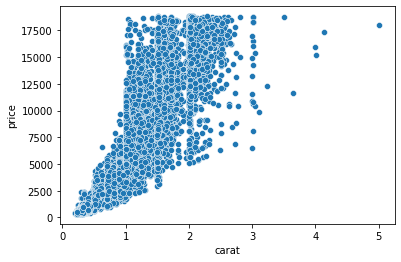

In [25]:
sns.scatterplot(df["carat"], df["price"]);

-----------

## Restart Linear Regression

In [329]:
lr = LinearRegression()

In [330]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32364, 7)
(8091, 7)
(32364, 1)
(8091, 1)


In [331]:
lr.fit(X_train, y_train)

LinearRegression()

In [332]:
y_pred = lr.predict(X_test)

In [333]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [[ 8.70012861e-04  8.81671275e+03 -4.24167814e+01 -2.63882873e+01
   6.19465280e+02  2.26002663e+03  4.20643029e+03]]
MSE:  1505284.33
Coef of Determ (1 is perfect): 0.91
RMSE: 1226.90


In [334]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [335]:
# Here we are making a simple experiment manilpulating 
# the parameters of Linear Regression to see if they affect our end results
params = {
    "copy_X": True,
    "fit_intercept": True,
    "n_jobs": 100,
    "normalize": True
}

In [336]:
lr.set_params(**params)

LinearRegression(n_jobs=100, normalize=True)

In [337]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=100, normalize=True)

In [338]:
y_pred = lr.predict(X_test)

In [340]:
# Here our results are the same as before.
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [[ 8.70012861e-04  8.81671275e+03 -4.24167814e+01 -2.63882873e+01
   6.19465280e+02  2.26002663e+03  4.20643029e+03]]
MSE:  1505284.33
Coef of Determ (1 is perfect): 0.91
RMSE: 1226.90


In [341]:
# We can see that infact the param variable we created has, 
# in fact, made changes to the parameters.
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 100, 'normalize': True}

### Apply our model to the test to make our predictions

In [346]:
new = pd.read_csv("diamonds-datamad1020/predict.csv")

In [347]:
new

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.30,Very Good,I,SI1,62.2,57.0,4.25,4.27,2.65
13481,13481,1.01,Ideal,J,VS2,62.3,55.0,6.40,6.44,4.00
13482,13482,0.33,Ideal,F,VVS1,61.9,55.0,4.43,4.46,2.75
13483,13483,0.30,Premium,G,VS2,59.3,59.0,4.42,4.38,2.61


In [348]:
cut = {"Fair": 0.20, 
       "Good": 0.40, 
       "Very Good": 0.60, 
       "Premium": 0.80, 
       "Ideal": 1.00}

color = {"J": 0.14, 
         "I": 0.28, 
         "H": 0.43, 
         "G": 0.57, 
         "F": 0.71, 
         "E": 0.85, 
         "D": 1.00}

clarity = {"I1": 0.125, 
           "SI2": 0.250, 
           "SI1": 0.375,
           "VS2": 0.500,
           "VS1": 0.625,
           "VVS2": 0.750,
           "VVS1": 0.875,
           "IF": 1.00} 

In [349]:
# Do the necessary preprocessing
new["cut_scale"] = new["cut"].replace(cut)
new["color_scale"]= new["color"].replace(color)
new["clarity_scale"] = new["clarity"].replace(clarity)
new = new.drop(["cut","color","clarity", "x","y","z"], axis=1)

In [350]:
new.columns

Index(['id', 'carat', 'depth', 'table', 'cut_scale', 'color_scale',
       'clarity_scale'],
      dtype='object')

In [351]:
predicted = lr.predict(new)

In [352]:
new["price"]=predicted

In [353]:
new.columns

Index(['id', 'carat', 'depth', 'table', 'cut_scale', 'color_scale',
       'clarity_scale', 'price'],
      dtype='object')

In [354]:
new = new.drop(['carat', 'depth', 'table', 'cut_scale', 'color_scale','clarity_scale'], axis=1)

In [355]:
new.to_csv("second_pred.csv",index=False)

------------------------------------------------------------------------------------------


# Construction: DO NOT CROSS THIS LINE: MEN AT WORK

In [103]:
def drop(X, *columns):
    return X.drop(columns=list(columns))

In [111]:
parameters = [["carat"]]
pipeline = [drop]

In [112]:
def prepare_data(X, pipeline, parameters):
    for f,p in zip(pipeline,parameters):
        X = f(X,*p)
    return X

In [113]:
def normalize_cols(X, *columns):
    for col in columns:
        X[col] = X[col] / X[col].max()
    return X

In [114]:
lr = LinearRegression()
X_train2 = prepare_data(X_train,pipeline,parameters)
X_test2 = prepare_data(X_test,pipeline,parameters)
lr.fit(X_train2,y_train)
y_pred = lr.predict(X_test2)

In [119]:
r2_score(y_test,y_pred)

0.06106077722970349

In [120]:
rmse = mean_squared_error(y_pred, y_test)**0.5
rmse

3886.2811182106248

<Figure size 432x288 with 0 Axes>

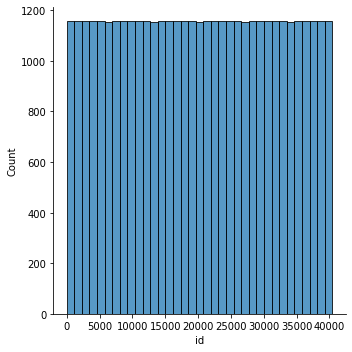

<Figure size 432x288 with 0 Axes>

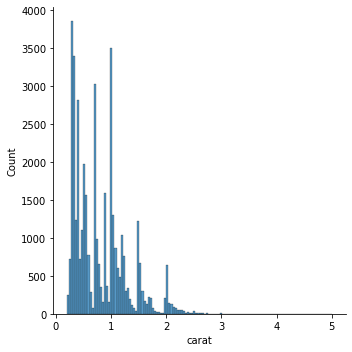

<Figure size 432x288 with 0 Axes>

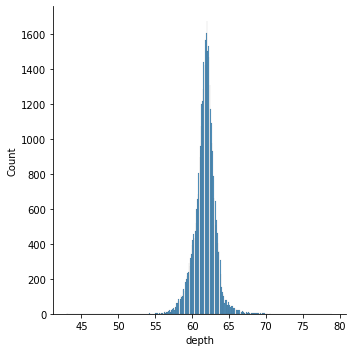

<Figure size 432x288 with 0 Axes>

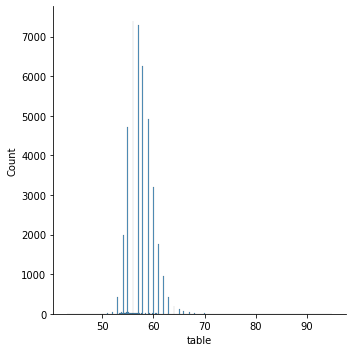

<Figure size 432x288 with 0 Axes>

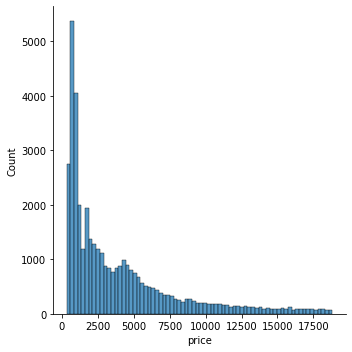

<Figure size 432x288 with 0 Axes>

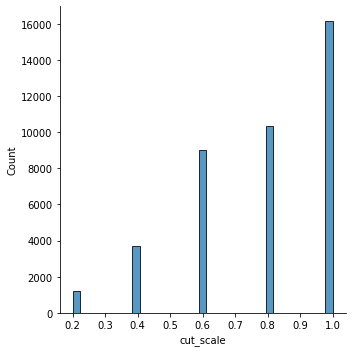

<Figure size 432x288 with 0 Axes>

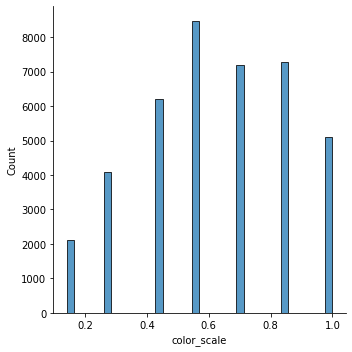

<Figure size 432x288 with 0 Axes>

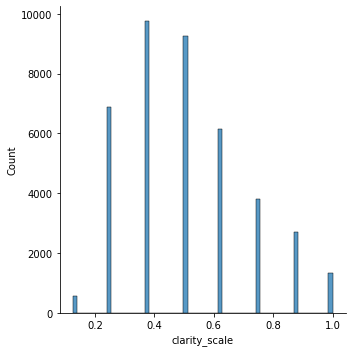

In [123]:
for col in df.columns:
    plt.figure()
    sns.displot(df[col])

In [121]:
params = [
        ["RAD"],
        ['CRIM', 'ZN', 'B']]
pipe = [drop, normalize_cols]

In [122]:
X = prepare_data(X_train,pipe,params)
lr = LinearRegression()
lr.fit(X, y_train)
Xtest = prepare_data(X_test, pipe, params)
lr.score(Xtest, y_test)

KeyError: "['RAD'] not found in axis"

### Apply our model to the test to make our predictions

In [79]:
new = pd.read_csv("diamonds-datamad1020/predict.csv")

In [80]:
new

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.30,Very Good,I,SI1,62.2,57.0,4.25,4.27,2.65
13481,13481,1.01,Ideal,J,VS2,62.3,55.0,6.40,6.44,4.00
13482,13482,0.33,Ideal,F,VVS1,61.9,55.0,4.43,4.46,2.75
13483,13483,0.30,Premium,G,VS2,59.3,59.0,4.42,4.38,2.61


In [81]:
cut = {"Fair": 0.20, 
       "Good": 0.40, 
       "Very Good": 0.60, 
       "Premium": 0.80, 
       "Ideal": 1.00}

color = {"J": 0.14, 
         "I": 0.28, 
         "H": 0.43, 
         "G": 0.57, 
         "F": 0.71, 
         "E": 0.85, 
         "D": 1.00}

clarity = {"I1": 0.125, 
           "SI2": 0.250, 
           "SI1": 0.375,
           "VS2": 0.500,
           "VS1": 0.625,
           "VVS2": 0.750,
           "VVS1": 0.875,
           "IF": 1.00} 

In [82]:
# Do the necessary preprocessing
new["cut_scale"] = new["cut"].replace(cut)
new["color_scale"]= new["color"].replace(color)
new["clarity_scale"] = new["clarity"].replace(clarity)
new = new.drop(["cut","color","clarity", "x","y","z"], axis=1)

In [83]:
new.columns

Index(['id', 'carat', 'depth', 'table', 'cut_scale', 'color_scale',
       'clarity_scale'],
      dtype='object')

In [33]:
predicted = lr.predict(new)

In [34]:
new["price"]=predicted

In [35]:
new.columns

Index(['id', 'carat', 'depth', 'table', 'cut_scale', 'color_scale',
       'clarity_scale', 'price'],
      dtype='object')

In [36]:
new = new.drop(['carat', 'depth', 'table', 'cut_scale', 'color_scale','clarity_scale'], axis=1)

In [181]:
new = new.drop(['carat', 'depth', 'table', 'cut_scale', 'color_scale','clarity_scale'], axis=1)

In [182]:
new.columns

Index(['id', 'price'], dtype='object')

In [178]:
new.to_csv("first_pred.csv")

In [179]:
open_new = pd.read_csv("first_pred.csv")

In [184]:
open_new.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [187]:
open_new.to_csv("first_pred.csv")

In [188]:
open_ = pd.read_csv("first_pred.csv")

In [191]:
open_

,Unnamed: 0,id,price
0,0,0,755.689776
1,1,1,6950.926870
2,2,2,1299.603547
3,3,3,2308.589276
4,4,4,838.753529
...,...,...,...
13480,13480,13480,-1892.163833
13481,13481,13481,4865.825253
13482,13482,13482,1728.817203
13483,13483,13483,-530.287796


In [190]:
open_ = open_.drop(["Unnamed: 0"])

KeyError: "['Unnamed: 0'] not found in axis"

In [147]:
errors = pd.DataFrame(columns=["mse_train","mse_test","coef"])

In [148]:
for k in range(1,30):
    # Fit transform X_train to Polynomial form.
    #poly = PolynomialFeatures(k)
    #X_poly = poly.fit_transform(X_train.reshape(-1,1))
    
    # Train Model
    lr = fit_poly(X_train,y_train,k)
    coef = lr.coef_
    
    # Calculate train error
    mse_train = mean_squared_error(y_train,lr.predict(X_poly))
    
    # Transform X_test to Polynomial form
    X_poly = poly.transform(X_test.reshape(-1,1))
    
    # Calculate test error
    mse_test = mean_squared_error(y_test,lr.predict(X_poly))
    
    # Store results
    errors = errors.append(pd.Series({"mse_train":mse_train,"mse_test":mse_test,"coef":coef}, name=k))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [71]:
b0,b1,b2,b3,b4,b5,b6 = lr.coef_[0]

In [72]:
b0 = lr.intercept_

In [73]:
lr_func = lambda x: b0*x**0 + b1*x**1 + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5 + b6*x**6
plt.scatter(x,y)
plt.plot(x, lr_func(x),c="orange");

NameError: name 'x' is not defined

In [62]:
mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, lr.predict(X_test))

In [63]:
errors = pd.DataFrame(columns=["mse_train","mse_test","coef"])

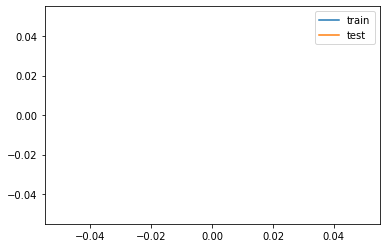

In [64]:
plt.plot(errors["mse_train"], label="train")
plt.plot(errors["mse_test"], label="test")
plt.legend();

In [40]:
def fit_poly(X,y,k):
    
    # Transforms our data to allow for Polynomial regression
    poly = PolynomialFeatures(k)
    X = poly.fit_transform(X.reshape(-1,1))
    
    # Linear Regression Model
    lr = LinearRegression()
    lr.fit(X,y)
    return lr

In [41]:
lr = fit_poly(X_train,y_train,2)



AttributeError: 'DataFrame' object has no attribute 'reshape'

In [76]:
errors = pd.DataFrame(columns=["Ridge_train","Ridge_test","LASSO_train","LASSO_test"])


In [77]:
alphas = [0,1,5,10,50,100]
coef = {}
for alpha in alphas:
    #Ridge
    ridge = Ridge(alpha=alpha,max_iter=100000)
    ridge.fit(X_train,y_train)
    ridge_train = mean_squared_error(y_train,ridge.predict(X_train))
    ridge_test = mean_squared_error(y_test,ridge.predict(X_test))
    
    #LASSO
    lasso = Lasso(alpha=alpha,max_iter=10000)
    lasso.fit(X_train,y_train)
    lasso_train = mean_squared_error(y_train,lasso.predict(X_train))
    lasso_test = mean_squared_error(y_test,lasso.predict(X_test))
    coef[alpha] = lasso.coef_
    
    errors = errors.append(pd.Series({
        "Ridge_train":ridge_train,
        "Ridge_test":ridge_test,
        "LASSO_train":lasso_train,
        "LASSO_test":lasso_test
    },name=alpha))

<ipython-input-77-3a4bbdf825e5>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,y_train)
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24420411129.439255, tolerance: 51876259.07410349
  model = cd_fast.enet_coordinate_descent(


In [78]:
errors

,Ridge_train,Ridge_test,LASSO_train,LASSO_test
0,1.509110e+06,1.610751e+06,1.509110e+06,1.610751e+06
1,1.509110e+06,1.610726e+06,1.509120e+06,1.610630e+06
5,1.509120e+06,1.610635e+06,1.509363e+06,1.610354e+06
10,1.509153e+06,1.610542e+06,1.510124e+06,1.610470e+06
50,1.510182e+06,1.610595e+06,1.534463e+06,1.629872e+06
100,1.513325e+06,1.612587e+06,1.609620e+06,1.699532e+06
